# Compton scattering
Here is an example for plotting various properties of the interaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.interactions import Compton

In [2]:
cc = Compton()

### Differential cross section
Plot the spectrum of EBL+CMB background photons scattered by leptons of various energies.
Lepton energy is assumed to be the energy at its interaction site.
The spectrum is for energies of the scattered photons once arriviing on Earth (z=0)

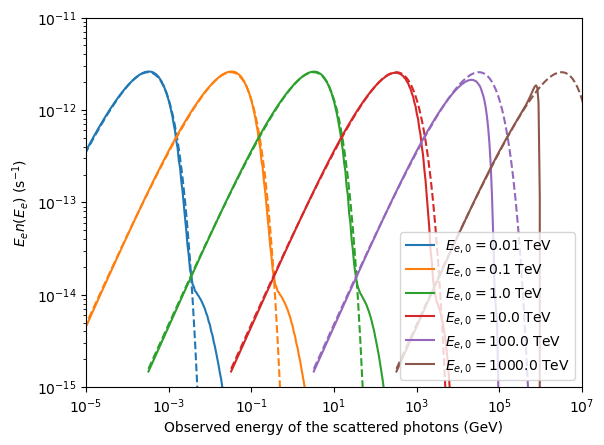

In [3]:
z = 0.
for Ee0 in [10*GeV,100*GeV,1*TeV,10*TeV,100*TeV,1000*TeV]:
    
    Ec = Ee0**2/(308*TeV)
    E =  np.logspace(np.log10(Ec/1.e4),np.log10(Ec*1.e2),200)
    dE = E[1:]-E[:-1]
    
    # Numerical cross section
    c1 = plt.loglog(E/GeV,E*cc.d2n_dt_deic(Ee0/mc2,E,z),label=r"$E_{e,0}=$"+f"{Ee0/TeV} TeV")
    
    # empirical approximation
    x = E/Ec
    plt.plot(E/GeV,x/(1+(5*x)**0.5)*np.exp(-x/1.5)/6.2e10,ls='--',color=c1[0].get_color())

plt.xlabel('Observed energy of the scattered photons (GeV)')
plt.ylabel(r'$E_e n(E_e)$ (s$^{-1}$)')
plt.xlim(1.e-5,1.e7)
plt.ylim(1.e-15,1.e-11)
plt.legend()
plt.show()

### Total cross section
Plot the total cross section.
Energies are assumed in the local, interaction frame.

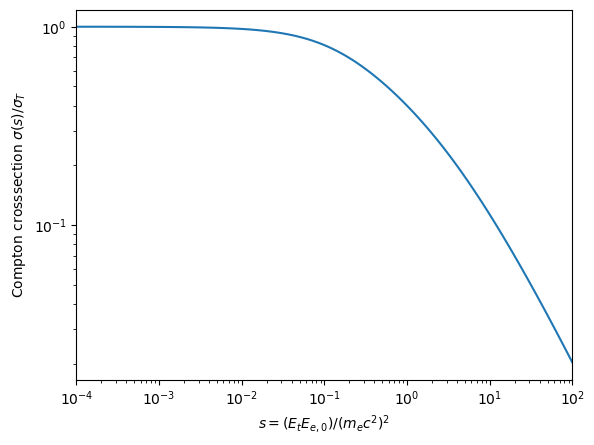

In [4]:
g = np.logspace(-4,2,100)
plt.loglog(g,cc.sigma(g)/sigmaT)
plt.xlabel(r"$s = (E_tE_{e,0})/(m_ec^2)^2$")
plt.ylabel(r"Compton crosssection $\sigma(s)/\sigma_T$")
plt.xlim(1.e-4,1.e2)
plt.show()

### Local interaction rate
Plot the local scattering rate seen by a photon starting at z=3.5 with local energy E0, as it travels away with time.
All results for Ee0<1 TeV give similar results for in the Thomson regime. Only very high eneregy leptons interacting in the Klein-Nishina regime show energy-dependent interaction rates.

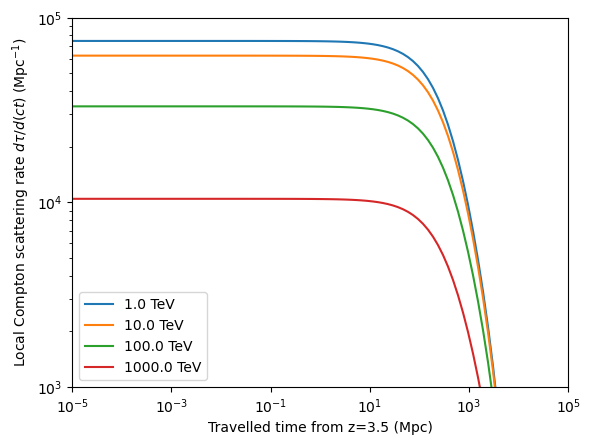

In [5]:
z0 = 3.5
dt = np.logspace(-5,5,100)*Mpc/c
dtau = np.zeros_like(dt)

for E0 in np.array([1*TeV,10*TeV,100*TeV,1.e3*TeV]):
    
    for i,tt in enumerate(cc.lcdm.t_z(z0)+dt):
        dtau[i] = cc.dtau_dt(tt,E0)
    
    plt.loglog(dt*c/Mpc,dtau/c*Mpc,label=f'{E0/TeV} TeV')

plt.ylim(1.e3,1.e5)
plt.xlim(1.e-5,1.e5)
plt.xlabel('Travelled time from z=3.5 (Mpc)')
plt.ylabel(r'Local Compton scattering rate $d\tau/d(ct)$ (Mpc$^{-1}$)')
plt.legend()
plt.show()

### Total optical depth
Plot the cumulative scattering optical depth of a lepton starting at z=3.5 with local energy E0, as it travels away with time.

The lepton energy only evolves with time due to cosmological expansion. Compton cooling is not taken into account.
    
At early times, the evolution is linear since the CMB temperature is rather constant. Only when the travel time becomes non negligible compared to the age of the univierse does the optical depth saturates.

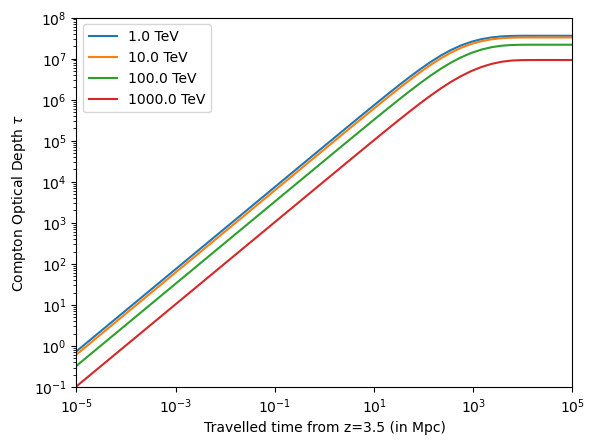

In [6]:
z0 = 3.5
t0 = cc.lcdm.t_z(z0)
tt = t0 + np.logspace(-5,5,50)*Mpc/c
tau = np.zeros_like(tt)
f = cc.lcdm.a_t(t0)/cc.lcdm.a_t(tt)

for E0 in [1*TeV,10*TeV,100*TeV,1.e3*TeV]:
    
    tau[0] = cc.dtau(t0,tt[0],E0)
    
    for i in range(1,len(tt)):
        tau[i] = tau[i-1] + cc.dtau(tt[i-1],tt[i],E0*f[i-1])
    
    plt.loglog((tt-t0)*c/Mpc,tau,label=f'{E0/TeV} TeV')

plt.xlabel('Travelled time from z=3.5 (in Mpc)')
plt.ylabel(r'Compton Optical Depth $\tau$ ')
plt.xlim(1.e-5,1.e5)
plt.ylim(1.e-1,1.e8)
plt.legend()
plt.show()

### Lepton mean free path
Plot the lepton Compton mean free path as a function of primary energy for different redshifts.

When comparing to the figure of my note, remember that the latter shows the cosmic travel time (as opposed to the comoving distance).

The lepton energy only evolves with time due to cosmological expansion. Compton cooling is not taken into account.

Again, the interaction distance is rather energy independent in the Thomson regime (<100 TeV) and increases in the Klein-Nishina regime (<100 TeV). The evolution with redshift is due to the cosmological CMB evolution. 

z= 0
z= 0.1
z= 0.5
z= 1
z= 2
z= 3


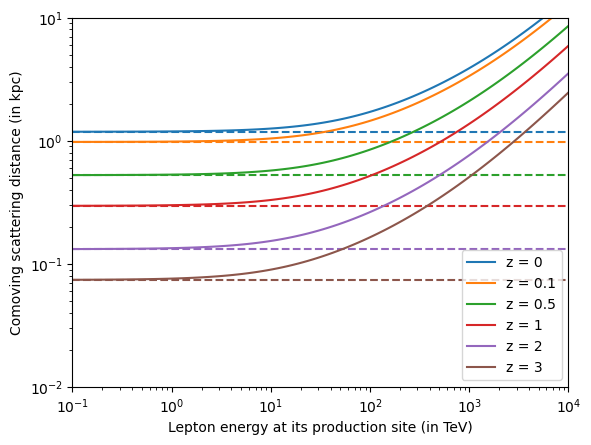

In [7]:
E0 = np.logspace(np.log10(0.1*TeV),np.log10(1.e4*TeV),100)

for z in [0,0.1,0.5,1,2,3]:

    print("z=",z)
    t = cc.lcdm.t_z(z)
    
    # Exact calculation
    c = plt.loglog(E0/TeV,cc.lmfp(t,E0)/kpc,label=f"z = {z}")
#    plt.loglog(E0/TeV,c*cc.Tmfp(t,E0)/kpc,label=f"{z}")

    # Approximation
    Lic = cc.lic(z)*np.ones_like(E0)/kpc
    Lic = Lic * (1+z) # approximate conversion from proper to comoving distance
    plt.loglog(E0/TeV,Lic,'--',color=c[0].get_color())


plt.xlabel('Lepton energy at its production site (in TeV)')
plt.ylabel('Comoving scattering distance (in kpc)')
plt.xlim(1.e-1,1.e4)
plt.ylim(1.e-2,1.e1)
plt.legend()
plt.show()

### Lepton cooling
Plot the lepton energy as a function of travel distance.

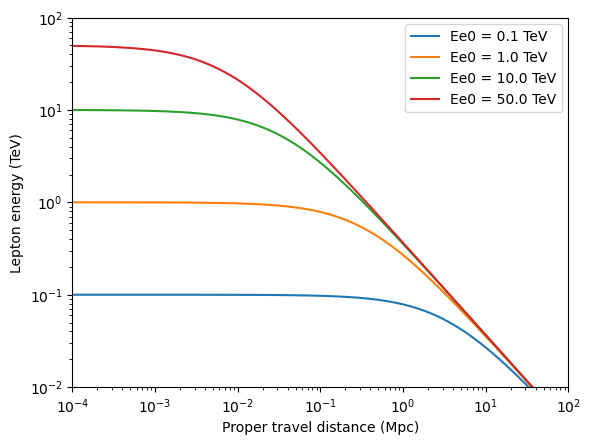

In [8]:
z = 0
x = np.logspace(np.log10(0.1*kpc),np.log10(1.e2*Mpc),100)
Ee0 = 1*TeV
for Ee0 in [0.1*TeV,1*TeV,10*TeV,50*TeV]:
    Ee = cc.ee_x(x,Ee0,z)
    plt.loglog(x/Mpc,Ee/TeV,label=f"Ee0 = {Ee0/TeV} TeV")
plt.xlim(1.e-4,1.e2)
plt.ylim(1.e-2,1.e2)
plt.xlabel('Proper travel distance (Mpc)')
plt.ylabel('Lepton energy (TeV)')
plt.legend()
plt.show()

Plot the average energy of photons as a function of the lepton travel distance.

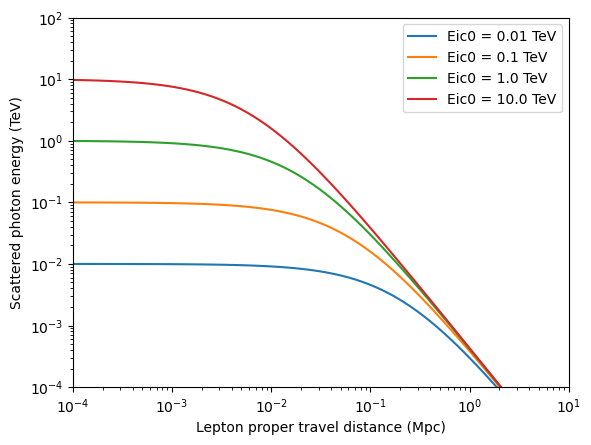

In [9]:
z = 0
x = np.logspace(np.log10(0.1*kpc),np.log10(1.e2*Mpc),100)
Eic0 = 1*TeV
for Eic0 in [10*GeV,0.1*TeV,1*TeV,10*TeV]:
    Eic = cc.eic_x(x,Eic0,z,at_earth=False)
    plt.loglog(x/Mpc,Eic/TeV,label=f"Eic0 = {Eic0/TeV} TeV")
plt.xlim(1.e-4,1.e1)
plt.ylim(1.e-4,1.e2)
plt.xlabel('Lepton proper travel distance (Mpc)')
plt.ylabel('Scattered photon energy (TeV)')
plt.legend()
plt.show()